In [1]:
#python notebook file which will contain data stratification and similar operations

# Predictive Modeling of Asset Returns: Data

**Author:** Cem Akkus  
**Institution:** Ludwig-Maximilians-Universität München  
**Date:** 14.07.2024

## 1. Module Imports

In [1]:
# !pip install yfinance
# !pip install yfinance_ticker_mapper

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Change working directory
new_dir = '/Users/cemakkus/PycharmProjects/Master/data'

os.chdir(new_dir)

## 2. Loading Data & Visualisations

In [5]:
# Load data
file_path = 'data/YUKKA_export_STOXX_50.csv'

data = pd.read_csv(file_path)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73950 entries, 0 to 73949
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  73950 non-null  object 
 1   company               73950 non-null  object 
 2   ISIN                  68034 non-null  object 
 3   positive              73950 non-null  float64
 4   negative              73950 non-null  float64
 5   sentiment             73950 non-null  float64
 6   volume                73950 non-null  int64  
 7   esg_score             73754 non-null  float64
 8   e_score               73754 non-null  float64
 9   s_score               73754 non-null  float64
 10  g_score               73754 non-null  float64
 11  general_risk_score    73754 non-null  float64
 12  esg_risk_score        73754 non-null  float64
 13  credit_risk_score     73754 non-null  float64
 14  immediate_risk_score  73754 non-null  float64
dtypes: float64(11), int

In [7]:
data.describe()

positive      negative     sentiment        volume     esg_score  \
count  73950.000000  73950.000000  73950.000000  73950.000000  73754.000000   
mean     149.729790     61.768154      0.732814    337.815808      4.837507   
std      262.363639    166.484842      0.190348    541.836531      2.742907   
min        0.000000      0.000000      0.011696      0.000000      0.006551   
25%       13.000000      2.000000      0.620049     35.000000      2.306369   
50%       49.000000     11.000000      0.777778    120.000000      4.869575   
75%      162.000000     41.000000      0.885714    405.000000      7.260046   
max     4095.000000   5826.000000      0.998158  12316.000000      9.958893   

            e_score       s_score       g_score  general_risk_score  \
count  73754.000000  73754.000000  73754.000000        73754.000000   
mean       6.338077      4.592493      3.681499            6.912950   
std        1.760275      1.517366      1.141220            2.049765   
min        0.098066      0.006124      0.052361            0.000000   
25%        5.418949      3.668641      2.944069            5.854468   
50%        6.350326      4.871922      3.879866            7.379637   
75%        7.459477      5.521731      4.680064            8.471881   
max        9.963494      9.616326      8.937651            9.990225   

       esg_risk_score  credit_risk_score  immediate_risk_score  
count    73754.000000       73754.000000          73754.000000  
mean         5.423169           4.831943              4.917236  
std          2.464851           4.210548              2.623233  
min          0.000000           0.000000              0.000000  
25%          3.713991           0.000000              2.918279  
50%          5.730232           7.214796              5.238293  
75%          7.363149           8.763414              6.995208  
max          9.990109           9.990043              9.989505

In [8]:
data.head()

date         company          ISIN  positive  negative  sentiment  \
0  2020-01-01  company:adidas  DE000A1EWWW0      74.0      14.0   0.833333   
1  2020-01-02  company:adidas  DE000A1EWWW0     170.0      27.0   0.859296   
2  2020-01-03  company:adidas  DE000A1EWWW0     181.0      33.0   0.842593   
3  2020-01-04  company:adidas  DE000A1EWWW0      50.0       9.0   0.836066   
4  2020-01-05  company:adidas  DE000A1EWWW0      61.0      16.0   0.784810   

   volume  esg_score   e_score   s_score   g_score  general_risk_score  \
0     154   2.143314  5.855780  6.188625  2.268089            8.563762   
1     285   2.200230  5.824604  6.146141  2.326606            8.495006   
2     344   2.140666  5.872963  6.200355  2.261408            8.575119   
3     100   2.142008  5.874547  6.206004  2.260589            8.579196   
4     105   2.158942  5.866310  6.196989  2.278841            8.562564   

   esg_risk_score  credit_risk_score  immediate_risk_score  
0        7.322443                0.0              7.627780  
1        7.207579                0.0              7.543789  
2        7.341766                0.0              7.636399  
3        7.346457                0.0              7.638169  
4        7.320154                0.0              7.616569

In [9]:
#specifying observed interval
startdate = "2021-01-01"
enddate = "2024-01-18"

##chosen time series with their ticker names on yahoo finance (source: https://de.finance.yahoo.com/quote/%5EGDAXI/components?p=%5EGDAXI)
es50 = '^STOXX50E'  

#dataframe - loading index values of the dax over time with specified start and enddate
yf_data = yf.Ticker(es50)
yf_data = yf_data.history(start=startdate, end=enddate)

In [10]:
# Ensure date column is in datetime format
if 'Date' in yf_data.columns:
    yf_data['Date'] = pd.to_datetime(yf_data['Date'])
    yf_data.set_index('Date', inplace=True)

# Ensure the index is a DatetimeIndex
if not pd.api.types.is_datetime64_any_dtype(yf_data.index):
    yf_data.index = pd.to_datetime(yf_data.index)

# Check the first few rows and the index to ensure dates are correct
print(yf_data.head())
print(yf_data.index)

                                  Open         High          Low        Close  \
Date                                                                            
2021-01-04 00:00:00+01:00  3565.679932  3609.909912  3548.310059  3564.389893   
2021-01-05 00:00:00+01:00  3554.239990  3574.979980  3524.629883  3547.850098   
2021-01-06 00:00:00+01:00  3559.810059  3620.570068  3547.449951  3611.080078   
2021-01-07 00:00:00+01:00  3621.159912  3635.639893  3604.129883  3622.419922   
2021-01-08 00:00:00+01:00  3632.139893  3657.830078  3630.709961  3645.050049   

                             Volume  Dividends  Stock Splits  
Date                                                          
2021-01-04 00:00:00+01:00  31524100        0.0           0.0  
2021-01-05 00:00:00+01:00  31896700        0.0           0.0  
2021-01-06 00:00:00+01:00  50984300        0.0           0.0  
2021-01-07 00:00:00+01:00  36856200        0.0           0.0  
2021-01-08 00:00:00+01:00  33364700        0.0        

In [11]:
# # Set date column as index after ensuring datetime format
# yf_data['Date'] = pd.to_datetime(yf_data['Date'])

# yf_data.set_index('Date', inplace=True)

In [12]:
#df_ar = df_sp.pct_change()[1:]

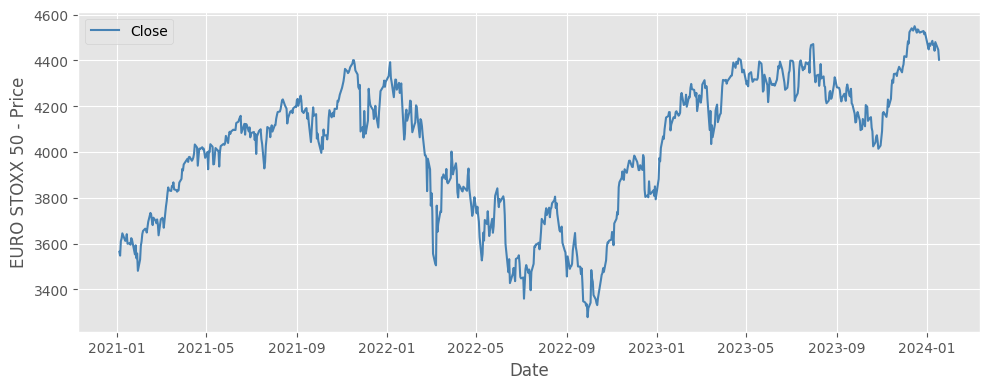

In [13]:
# Plot of price series
plt.figure(figsize=(10, 4))
plt.plot(yf_data.index, yf_data['Close'], marker='', color='steelblue', linewidth=1.5, label="Close")
plt.xlabel('Date')
plt.ylabel('EURO STOXX 50 - Price')
# plt.title('EURO STOXX 50 - Close Prices Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
# Creating return series
yf_data['1d_return'] = ((yf_data['Close'] - yf_data['Close'].shift(1)) / yf_data['Close'].shift(1))

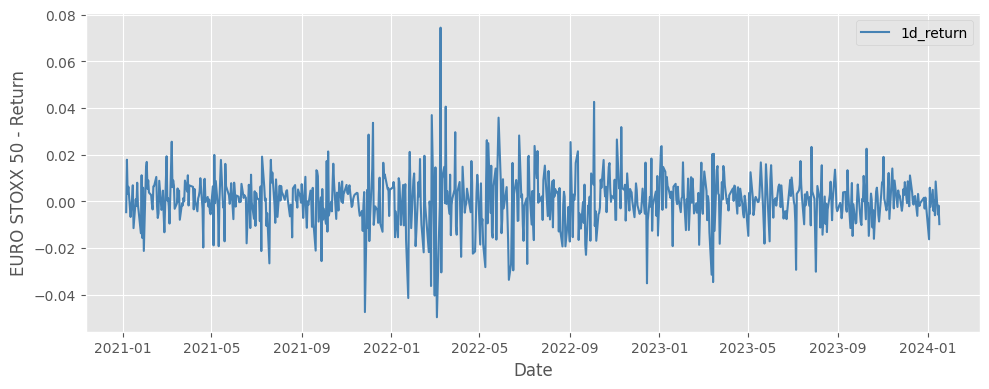

In [15]:
#Plot of return series
plt.figure(figsize=(10, 4))
plt.plot(yf_data.index, yf_data['1d_return'], marker='', color='steelblue', linewidth=1.5, label="1d_return")
plt.xlabel('Date')
plt.ylabel('EURO STOXX 50 - Return')
#plt.title('EURO STOXX 50 - Returns Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Function - counting outliers in the time series for data observation
def count_outliers(time_series):
    pos_outlier, neg_outlier = 0, 0
    q1,q3 = np.percentile(time_series,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    for num in time_series: 
      
    # checking condition 
        if num >= upper_bound: 
            pos_outlier += 1
  
        elif num <= lower_bound: 
            neg_outlier += 1
    
    print('Outliers in Asset Return Series: ', pos_outlier+neg_outlier) 
    print('Outliers exceeding Upper Bound in Asset Return Series: ', pos_outlier) 
    print('Outliers falling below Lower Bound in Asset Return Series: ', neg_outlier) 

In [17]:
# Other definition needed for outlier function
yf_data_ar = yf_data.pct_change()[1:]

In [18]:
# Outliers of asset return series
count_outliers(yf_data_ar['Close'])

Outliers in Asset Return Series:  35
Outliers exceeding Upper Bound in Asset Return Series:  15
Outliers falling below Lower Bound in Asset Return Series:  20


In [19]:
yf_data_ar

Open      High       Low     Close    Volume  \
Date                                                                          
2021-01-05 00:00:00+01:00 -0.003208 -0.009676 -0.006674 -0.004640  0.011820   
2021-01-06 00:00:00+01:00  0.001567  0.012753  0.006474  0.017822  0.598419   
2021-01-07 00:00:00+01:00  0.017234  0.004162  0.015978  0.003140 -0.277107   
2021-01-08 00:00:00+01:00  0.003032  0.006104  0.007375  0.006247 -0.094733   
2021-01-11 00:00:00+01:00  0.001247 -0.004399 -0.009805 -0.006702 -0.084661   
...                             ...       ...       ...       ...       ...   
2024-01-11 00:00:00+01:00  0.003190  0.005621 -0.004054 -0.005975  0.183914   
2024-01-12 00:00:00+01:00 -0.006284 -0.003823  0.002652  0.008496 -0.140292   
2024-01-15 00:00:00+01:00  0.006903 -0.000730 -0.000496 -0.005656 -0.213326   
2024-01-16 00:00:00+01:00 -0.009092 -0.009141 -0.008221 -0.001834  0.394845   
2024-01-17 00:00:00+01:00 -0.005089 -0.006261 -0.007582 -0.009767  0.163366   

                           Dividends  Stock Splits  1d_return  
Date                                                           
2021-01-05 00:00:00+01:00        NaN           NaN        NaN  
2021-01-06 00:00:00+01:00        NaN           NaN  -4.840722  
2021-01-07 00:00:00+01:00        NaN           NaN  -0.823797  
2021-01-08 00:00:00+01:00        NaN           NaN   0.989382  
2021-01-11 00:00:00+01:00        NaN           NaN  -2.072829  
...                              ...           ...        ...  
2024-01-11 00:00:00+01:00        NaN           NaN -15.745037  
2024-01-12 00:00:00+01:00        NaN           NaN  -2.421977  
2024-01-15 00:00:00+01:00        NaN           NaN  -1.665772  
2024-01-16 00:00:00+01:00        NaN           NaN  -0.675733  
2024-01-17 00:00:00+01:00        NaN           NaN   4.325252  

[769 rows x 8 columns]

In [20]:
# Outliers inspection

yf_data.reset_index(inplace=True)

top_15 = yf_data.sort_values(by='1d_return', ascending=False).head(15)
bottom_20 = yf_data.sort_values(by='1d_return', ascending=True).head(20)

print("Top 15 biggest values in 1d_return with dates:")
print(top_15[['Date', '1d_return']])

print("\nBottom 20 smallest values in 1d_return with dates:")
print(bottom_20[['Date', '1d_return']])


Top 15 biggest values in 1d_return with dates:
                         Date  1d_return
301 2022-03-09 00:00:00+01:00   0.074382
445 2022-10-04 00:00:00+02:00   0.042580
306 2022-03-16 00:00:00+01:00   0.040550
293 2022-02-25 00:00:00+01:00   0.036926
355 2022-05-27 00:00:00+02:00   0.035833
237 2021-12-07 00:00:00+01:00   0.033620
472 2022-11-10 00:00:00+01:00   0.031794
315 2022-03-29 00:00:00+02:00   0.029606
233 2021-12-01 00:00:00+01:00   0.028572
374 2022-06-24 00:00:00+02:00   0.028193
468 2022-11-04 00:00:00+01:00   0.026481
344 2022-05-11 00:00:00+02:00   0.026182
45  2021-03-08 00:00:00+01:00   0.025535
423 2022-09-02 00:00:00+02:00   0.025365
346 2022-05-13 00:00:00+02:00   0.024904

Bottom 20 smallest values in 1d_return with dates:
                         Date  1d_return
298 2022-03-04 00:00:00+01:00  -0.049647
230 2021-11-26 00:00:00+01:00  -0.047437
269 2022-01-24 00:00:00+01:00  -0.041423
295 2022-03-01 00:00:00+01:00  -0.040359
292 2022-02-24 00:00:00+01:00  -0.036271

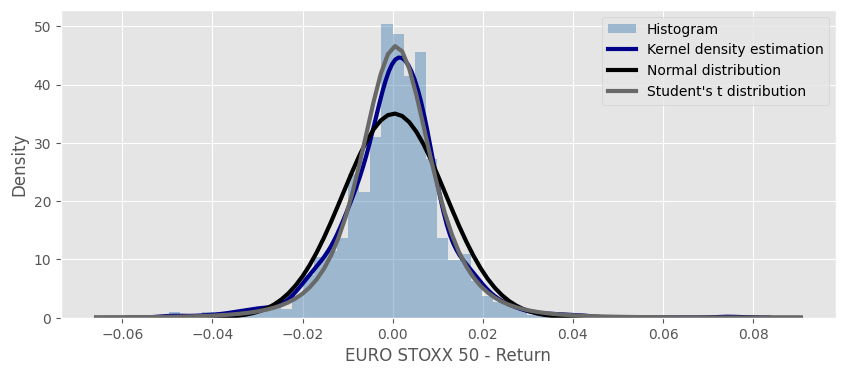

In [21]:
# Histogram and similar distrubtions to return series

returns = yf_data['1d_return'].dropna()

# Plot histogram
plt.figure(figsize=(10, 4))
plt.hist(returns, bins=50, density=True, alpha=0.45, color='steelblue', label='Histogram')

# Plot Kernel Density Estimation
sns.kdeplot(returns, bw_adjust=1, color='darkblue', linewidth=3, label='Kernel density estimation')

# Plot Normal distribution
mu, std = stats.norm.fit(returns)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, '-k', linewidth=3, label='Normal distribution')

# Plot Student's t distribution
df, loc, scale = stats.t.fit(returns)
t = stats.t.pdf(x, df, loc, scale)
plt.plot(x, t, 'dimgray', linewidth=3, label="Student's t distribution")

plt.xlabel('EURO STOXX 50 - Return')
plt.ylabel('Density')
#plt.title('Histogram of 1d Returns with Normal, Student\'s t, and KDE')
plt.legend()


In [22]:
# Basic figures regarding asset returns
print('Mean of Index (Asset Return Series):',round((yf_data['1d_return']).mean(),6))
print('Standard Deviation of Index (Asset Return Series):',round((yf_data['1d_return']).std(),6))
print('Average Daily Fluctuation of Index (Asset Return Series):',round((abs(yf_data['1d_return'])).mean(),6))

Mean of Index (Asset Return Series): 0.00034
Standard Deviation of Index (Asset Return Series): 0.011398
Average Daily Fluctuation of Index (Asset Return Series): 0.008155


In [23]:
# if isinstance(yf_data, pd.DataFrame):
#     num_rows, num_cols = data.shape
#     print(f"The variable 'data' is a DataFrame with {num_rows} rows and {num_cols} columns.")

## 2. Data Transformations

### 2.1. Ticker Symbols

In [24]:
unique_companies = data['company'].unique()
print(unique_companies)

['company:adidas' 'company:adyen' 'company:ahold_delhaize'
 'company:airbus' 'company:allianz' 'company:anheuser_busch'
 'company:asml' 'company:axa' 'company:banco_bilbao_vizcaya_argentaria'
 'company:banco_santander' 'company:basf' 'company:bayer' 'company:bmw'
 'company:bnp_paribas' 'company:crh' 'company:daimler' 'company:danone'
 'company:deutsche_boerse' 'company:deutsche_post'
 'company:deutsche_telekom' 'company:enel' 'company:eni'
 'company:essilor_international' 'company:hermes_international'
 'company:iberdrola' 'company:industria_de_diseno_textil'
 'company:infineon' 'company:ing' 'company:intesa_sanpaolo'
 'company:kering' 'company:l_air_liquide_sa' 'company:l_oreal'
 'company:moet_hennessy_louis_vuitton' 'company:muenchener_rueck'
 'company:nokia' 'company:nordea_bank_abp' 'company:paddy_power_betfair'
 'company:pernod_ricard' 'company:prosus_nv' 'company:safran'
 'company:sanofi' 'company:sap' 'company:schneider_electric'
 'company:siemens' 'company:stellantis_nv' 'compa

In [25]:
# Mapping dictionary for companies to ISIN
companies_to_ISIN = {
    'company:l_air_liquide_sa': 'FR0000120073',
    'company:nordea_bank_abp': 'FI4000297767',
    'company:sanofi': 'FR0000120578',
    'company:vinci_sa': 'FR0000125486'
}

# Function to update ISIN based on company mapping
def update_ISIN(row):
    company = row['company']

    # Check if company is in the mapping for ISIN
    if company in companies_to_ISIN:
        # Assign the corresponding ISIN
        row['ISIN'] = companies_to_ISIN[company]

    return row

# Function to get ticker symbol based on ISIN or direct assignment
def get_ticker_symbol(row):
    ISIN = row['ISIN']

    # Check if ISIN is available
    if ISIN:
        try:
            # Try fetching ticker symbol using yfinance
            ticker = yf.Ticker(ISIN)
            return ticker.info['symbol']
        except:
            return None  # Handle cases where ISIN cannot be mapped to a ticker symbol
    else:
        # If ISIN is not available, return None
        return None

# Apply the update_ISIN function to update 'ISIN' column
data = data.apply(update_ISIN, axis=1)

# Apply the get_ticker_symbol function to create or update the 'ticker' column
data['ticker'] = data.apply(get_ticker_symbol, axis=1)

# Print the updated DataFrame
print(data)

date          company          ISIN  positive  negative  \
0      2020-01-01   company:adidas  DE000A1EWWW0      74.0      14.0   
1      2020-01-02   company:adidas  DE000A1EWWW0     170.0      27.0   
2      2020-01-03   company:adidas  DE000A1EWWW0     181.0      33.0   
3      2020-01-04   company:adidas  DE000A1EWWW0      50.0       9.0   
4      2020-01-05   company:adidas  DE000A1EWWW0      61.0      16.0   
...           ...              ...           ...       ...       ...   
73945  2024-01-14  company:vonovia  DE000A1ML7J1      26.0       4.0   
73946  2024-01-15  company:vonovia  DE000A1ML7J1      90.0      25.0   
73947  2024-01-16  company:vonovia  DE000A1ML7J1      28.0      55.0   
73948  2024-01-17  company:vonovia  DE000A1ML7J1      74.0      80.0   
73949  2024-01-18  company:vonovia  DE000A1ML7J1      84.0      23.0   

       sentiment  volume  esg_score   e_score   s_score   g_score  \
0       0.833333     154   2.143314  5.855780  6.188625  2.268089   
1       0.859296     285   2.200230  5.824604  6.146141  2.326606   
2       0.842593     344   2.140666  5.872963  6.200355  2.261408   
3       0.836066     100   2.142008  5.874547  6.206004  2.260589   
4       0.784810     105   2.158942  5.866310  6.196989  2.278841   
...          ...     ...        ...       ...       ...       ...   
73945   0.843750      73   5.996998  6.087267  5.038861  4.647588   
73946   0.777778     325   5.987143  6.068598  5.039883  4.678679   
73947   0.341176     227   5.987697  6.061109  5.040661  4.701799   
73948   0.480769     285   6.044544  6.111834  5.041860  4.697307   
73949   0.779817     112   6.105178  6.174193  5.043305  4.688897   

       general_risk_score  esg_risk_score  credit_risk_score  \
0                8.563762        7.322443           0.000000   
1                8.495006        7.207579           0.000000   
2                8.575119        7.341766           0.000000   
3                8.579196        7.346457           0.000000   
4                8.562564        7.320154           0.000000   
...                   ...             ...                ...   
73945            3.873418        1.292404           6.801917   
73946            3.772778        1.195484           6.883902   
73947            3.640773        1.115224           6.964853   
73948            3.718662        1.128417           7.215820   
73949            3.829121        1.160660           7.361161   

       immediate_risk_score  
0                  7.627780  
1                  7.543789  
2                  7.636399  
3                  7.638169  
4                  7.616569  
...                     ...  
73945              1.114564  
73946              1.027274  
73947              0.962351  
73948              0.973105  
73949              1.000563  

[73950 rows x 15 columns]

In [26]:
print(data.columns)

Index(['date', 'company', 'ISIN', 'positive', 'negative', 'sentiment',
       'volume', 'esg_score', 'e_score', 's_score', 'g_score',
       'general_risk_score', 'esg_risk_score', 'credit_risk_score',
       'immediate_risk_score', 'ticker'],
      dtype='object')


In [ ]:
unique_ticker = data['ticker'].unique()
print(unique_ticker)

In [ ]:
# Count the non-NaN values in the 'ticker' column
non_nan_count = data['ticker'].count()
print(f"Number of rows with non-NaN values in the 'ticker' column: {non_nan_count}")

In [ ]:
# # Save check point to a file
# data.to_csv('/Users/cemakkus/PycharmProjects/Master/YUKKA_export_STOXX_50_ticker.csv', index=False)

### 2.2. Close Prices

In [7]:
#checkpoint
import pandas as pd
import yfinance as yf

In [11]:
file_path = 'YUKKA_export_STOXX_50_ticker.csv'

data = pd.read_csv(file_path)

In [12]:
# Count the non-NaN values in the 'ticker' column
non_nan_count = data['ticker'].count()

# Print the result
print(f"Number of rows with non-NaN values in the 'ticker' column: {non_nan_count}")

Number of rows with non-NaN values in the 'ticker' column: 73950


In [13]:
def fetch_close_prices(df):
    df['date'] = pd.to_datetime(df['date'])

    # Determine the overall date range for the entire DataFrame
    start_date = df['date'].min().strftime('%Y-%m-%d')
    end_date = df['date'].max().strftime('%Y-%m-%d')

    # Initialize a dictionary to store the downloaded data for each ticker
    ticker_data = {}

    # Get unique tickers from the DataFrame
    tickers = df['ticker'].unique()

    # Download data for each ticker
    for ticker in tickers:
        print(f"Downloading data for {ticker} from {start_date} to {end_date}")
        try:
            ticker_data[ticker] = yf.download(ticker, start=start_date, end=end_date, progress=False)
        except Exception as e:
            print(f"Failed to download data for {ticker}: {e}")

    close_prices = []

    # Loop through each row in the dataframe
    for index, row in df.iterrows():
        ticker = row['ticker']
        date = row['date']

        # Fetch the appropriate ticker data
        data = ticker_data.get(ticker)

        if data is not None and not data.empty:
            data_on_date = data.loc[data.index == pd.to_datetime(date)]

            if not data_on_date.empty and 'Close' in data_on_date.columns:
                close_price = data_on_date['Close'].iloc[0]
                print(f"Close price for {ticker} on {date.strftime('%Y-%m-%d')} is {close_price}")
            else:
                print(f"No data for {ticker} on {date.strftime('%Y-%m-%d')}. Data might be empty or 'Close' column is missing.")
                close_price = None
        else:
            close_price = None

        close_prices.append(close_price)

    df['Close'] = close_prices
    print("Close prices appended to the DataFrame.")

fetch_close_prices(data)
print(data)


No data for ADS.DE on 2020-01-01. Data might be empty or 'Close' column is missing.
Close price for ADS.DE on 2020-01-02 is 291.54998779296875
Close price for ADS.DE on 2020-01-03 is 291.95001220703125
No data for ADS.DE on 2020-01-04. Data might be empty or 'Close' column is missing.
No data for ADS.DE on 2020-01-05. Data might be empty or 'Close' column is missing.
Close price for ADS.DE on 2020-01-06 is 289.6499938964844
Close price for ADS.DE on 2020-01-07 is 294.75
Close price for ADS.DE on 2020-01-08 is 302.8500061035156
Close price for ADS.DE on 2020-01-09 is 310.0
Close price for ADS.DE on 2020-01-10 is 309.04998779296875
No data for ADS.DE on 2020-01-11. Data might be empty or 'Close' column is missing.
No data for ADS.DE on 2020-01-12. Data might be empty or 'Close' column is missing.
Close price for ADS.DE on 2020-01-13 is 309.1499938964844
Close price for ADS.DE on 2020-01-14 is 313.25
Close price for ADS.DE on 2020-01-15 is 316.04998779296875
Close price for ADS.DE on 2020

In [14]:
print(data.columns)

Index(['date', 'company', 'ISIN', 'positive', 'negative', 'sentiment',
       'volume', 'esg_score', 'e_score', 's_score', 'g_score',
       'general_risk_score', 'esg_risk_score', 'credit_risk_score',
       'immediate_risk_score', 'ticker', 'Close'],
      dtype='object')


In [15]:
print(data.head)

<bound method NDFrame.head of             date          company          ISIN  positive  negative  \
0     2020-01-01   company:adidas  DE000A1EWWW0      74.0      14.0   
1     2020-01-02   company:adidas  DE000A1EWWW0     170.0      27.0   
2     2020-01-03   company:adidas  DE000A1EWWW0     181.0      33.0   
3     2020-01-04   company:adidas  DE000A1EWWW0      50.0       9.0   
4     2020-01-05   company:adidas  DE000A1EWWW0      61.0      16.0   
...          ...              ...           ...       ...       ...   
73945 2024-01-14  company:vonovia  DE000A1ML7J1      26.0       4.0   
73946 2024-01-15  company:vonovia  DE000A1ML7J1      90.0      25.0   
73947 2024-01-16  company:vonovia  DE000A1ML7J1      28.0      55.0   
73948 2024-01-17  company:vonovia  DE000A1ML7J1      74.0      80.0   
73949 2024-01-18  company:vonovia  DE000A1ML7J1      84.0      23.0   

       sentiment  volume  esg_score   e_score   s_score   g_score  \
0       0.833333     154   2.143314  5.855780  6

In [16]:
# Count of NaN values in the 'Close' column
nan_count = data['Close'].isna().sum()

# Count of non-NaN values in the 'Close' column
non_nan_count = data['Close'].notna().sum()

print(f"Count of NaN values in 'Close': {nan_count}")
print(f"Count of non-NaN values in 'Close': {non_nan_count}")


Count of NaN values in 'Close': 22212
Count of non-NaN values in 'Close': 51738


In [31]:
#data.to_csv('/Users/cemakkus/PycharmProjects/Master/YUKKA_export_STOXX_50_Close.csv', index=False)

## 2.3. Dataframes for each Company

In [17]:
#checkpoint
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [19]:
file_path = 'YUKKA_export_STOXX_50_Close.csv'

data = pd.read_csv(file_path)

In [20]:
# Count of NaN values in the 'Close' column
nan_count = data['Close'].isna().sum()

# Count of non-NaN values in the 'Close' column
non_nan_count = data['Close'].notna().sum()

print(f"Count of NaN values in 'Close': {nan_count}")
print(f"Count of non-NaN values in 'Close': {non_nan_count}")


Count of NaN values in 'Close': 22313
Count of non-NaN values in 'Close': 51637


In [21]:
data.head(20)

date         company          ISIN  positive  negative  sentiment  \
0   2020-01-01  company:adidas  DE000A1EWWW0      74.0      14.0   0.833333   
1   2020-01-02  company:adidas  DE000A1EWWW0     170.0      27.0   0.859296   
2   2020-01-03  company:adidas  DE000A1EWWW0     181.0      33.0   0.842593   
3   2020-01-04  company:adidas  DE000A1EWWW0      50.0       9.0   0.836066   
4   2020-01-05  company:adidas  DE000A1EWWW0      61.0      16.0   0.784810   
5   2020-01-06  company:adidas  DE000A1EWWW0     203.0      56.0   0.781609   
6   2020-01-07  company:adidas  DE000A1EWWW0     398.0      62.0   0.863636   
7   2020-01-08  company:adidas  DE000A1EWWW0     493.0      35.0   0.932075   
8   2020-01-09  company:adidas  DE000A1EWWW0     344.0      37.0   0.900783   
9   2020-01-10  company:adidas  DE000A1EWWW0     311.0      46.0   0.869081   
10  2020-01-11  company:adidas  DE000A1EWWW0      77.0      14.0   0.838710   
11  2020-01-12  company:adidas  DE000A1EWWW0      51.0      11.0   0.812500   
12  2020-01-13  company:adidas  DE000A1EWWW0     294.0      20.0   0.933544   
13  2020-01-14  company:adidas  DE000A1EWWW0     567.0      26.0   0.954622   
14  2020-01-15  company:adidas  DE000A1EWWW0     361.0     106.0   0.771855   
15  2020-01-16  company:adidas  DE000A1EWWW0     287.0     107.0   0.727273   
16  2020-01-17  company:adidas  DE000A1EWWW0     241.0      52.0   0.820339   
17  2020-01-18  company:adidas  DE000A1EWWW0     203.0      27.0   0.879310   
18  2020-01-19  company:adidas  DE000A1EWWW0      93.0      19.0   0.824561   
19  2020-01-20  company:adidas  DE000A1EWWW0     282.0      32.0   0.895570   

    volume  esg_score   e_score   s_score   g_score  general_risk_score  \
0      154   2.143314  5.855780  6.188625  2.268089            8.563762   
1      285   2.200230  5.824604  6.146141  2.326606            8.495006   
2      344   2.140666  5.872963  6.200355  2.261408            8.575119   
3      100   2.142008  5.874547  6.206004  2.260589            8.579196   
4      105   2.158942  5.866310  6.196989  2.278841            8.562564   
5      345   2.183429  5.849086  6.183572  2.298638            8.549013   
6      720   2.476309  5.675907  5.971007  2.590560            8.214989   
7      760   2.777694  5.538885  5.791011  2.894973            7.807416   
8      656   2.895794  5.504750  5.732086  3.000383            7.673235   
9      811   2.974406  5.474977  5.695977  3.077565            7.527904   
10     165   3.002122  5.473143  5.692648  3.103695            7.475715   
11     120   3.007074  5.476777  5.699379  3.109586            7.453640   
12     519   3.044364  5.465458  5.689552  3.145465            7.348987   
13     773   3.110463  5.438854  5.667499  3.216915            7.205935   
14     686   3.092857  5.442781  5.688768  3.199814            7.199771   
15     679   3.102257  5.425974  5.696280  3.209104            7.149577   
16     464   3.078241  5.426755  5.719615  3.181225            7.174067   
17     293   3.137168  5.392581  5.669177  3.244182            7.047036   
18     173   3.166483  5.376858  5.635047  3.262403            6.991457   
19     494   3.172403  5.374379  5.607163  3.261532            6.982691   

    esg_risk_score  credit_risk_score  immediate_risk_score  ticker  \
0         7.322443                0.0              7.627780  ADS.DE   
1         7.207579                0.0              7.543789  ADS.DE   
2         7.341766                0.0              7.636399  ADS.DE   
3         7.346457                0.0              7.638169  ADS.DE   
4         7.320154                0.0              7.616569  ADS.DE   
5         7.299215                0.0              7.585560  ADS.DE   
6         6.792817                0.0              7.141437  ADS.DE   
7         6.271918                0.0              6.620191  ADS.DE   
8         6.077744                0.0              6.410112  ADS.DE   
9         5.916410                0.0              6.265914  ADS

In [22]:
data.columns

Index(['date', 'company', 'ISIN', 'positive', 'negative', 'sentiment',
       'volume', 'esg_score', 'e_score', 's_score', 'g_score',
       'general_risk_score', 'esg_risk_score', 'credit_risk_score',
       'immediate_risk_score', 'ticker', 'Close'],
      dtype='object')

In [23]:
# Group by 'ticker' and identify the first and last occurrence
ticker_group = data.groupby('ticker')
ticker_first_last = ticker_group.agg({'date': ['first', 'last']})

# Reset index to make 'ticker' a column again
ticker_first_last = ticker_first_last.reset_index()

# Rename columns for clarity
ticker_first_last.columns = ['ticker', 'first_date', 'last_date']

# Display the result
print(ticker_first_last)


       ticker  first_date   last_date
0      ABI.BR  2020-01-01  2024-01-18
1       AD.AS  2020-01-01  2024-01-18
2      ADS.DE  2020-01-01  2024-01-18
3    ADYEN.AS  2020-01-01  2024-01-18
4       AI.PA  2020-01-01  2024-01-18
5      AIR.PA  2020-01-01  2024-01-18
6      ALV.DE  2020-01-01  2024-01-18
7     ASML.AS  2020-01-01  2024-01-18
8      BAS.DE  2020-01-01  2024-01-18
9     BAYN.DE  2020-01-01  2024-01-18
10    BBVA.MC  2020-01-01  2024-01-18
11     BMW.DE  2020-01-01  2024-01-18
12      BN.PA  2020-01-01  2024-01-18
13     BNP.PA  2020-01-01  2024-01-18
14        CRH  2020-01-01  2024-01-18
15      CS.PA  2020-01-01  2024-01-18
16     DB1.DE  2020-01-01  2024-01-18
17      DG.PA  2020-01-01  2024-01-18
18     DHL.DE  2020-01-01  2024-01-18
19     DTE.DE  2020-01-01  2024-01-18
20      EL.PA  2020-01-01  2024-01-18
21    ENEL.MI  2020-01-01  2024-01-18
22     ENI.MI  2020-01-01  2024-01-18
23     FLTR.L  2020-01-01  2024-01-18
24     IBE.MC  2020-01-01  2024-01-18
25     IFX.D

In [24]:
# Group by 'ticker' and calculate first date, last date, and number of rows
ticker_stats = data.groupby('ticker').agg(first_date=('date', 'min'),
                                          last_date=('date', 'max'),
                                          num_rows=('date', 'size'))

# Check if all tickers have the same first and last date
same_first_date = ticker_stats['first_date'].nunique() == 1
same_last_date = ticker_stats['last_date'].nunique() == 1

# Check if all tickers have the same number of rows
same_num_rows = ticker_stats['num_rows'].nunique() == 1

# Print results
print(f"All tickers have the same first date: {same_first_date}")
print(f"All tickers have the same last date: {same_last_date}")
print(f"All tickers have the same number of rows: {same_num_rows}")

# Optional: print the unique first date, last date, and number of rows if they are the same for all tickers
if same_first_date:
    print(f"Common first date: {ticker_stats['first_date'].iloc[0]}")
if same_last_date:
    print(f"Common last date: {ticker_stats['last_date'].iloc[0]}")
if same_num_rows:
    print(f"Common number of rows: {ticker_stats['num_rows'].iloc[0]}")


All tickers have the same first date: True
All tickers have the same last date: True
All tickers have the same number of rows: True
Common first date: 2020-01-01
Common last date: 2024-01-18
Common number of rows: 1479


In [112]:
# Create a dictionary to store dataframes for each company
data_dict = {}

for ticker, group_data in data.groupby('ticker'):
    # Remove 'ticker' column as it's the same value within the group
    group_data = group_data.drop(columns=['ticker'])
    
    # Replace dots in ticker symbols with underscores to create valid keys
    valid_ticker_name = ticker.replace('.', '_')
    
    # Add the DataFrame to data_dict
    data_dict[valid_ticker_name] = group_data.reset_index(drop=True)
    
    print(f'DataFrame for {valid_ticker_name} created with shape {group_data.shape}')


DataFrame for ABI_BR created with shape (1479, 16)
DataFrame for AD_AS created with shape (1479, 16)
DataFrame for ADS_DE created with shape (1479, 16)
DataFrame for ADYEN_AS created with shape (1479, 16)
DataFrame for AI_PA created with shape (1479, 16)
DataFrame for AIR_PA created with shape (1479, 16)
DataFrame for ALV_DE created with shape (1479, 16)
DataFrame for ASML_AS created with shape (1479, 16)
DataFrame for BAS_DE created with shape (1479, 16)
DataFrame for BAYN_DE created with shape (1479, 16)
DataFrame for BBVA_MC created with shape (1479, 16)
DataFrame for BMW_DE created with shape (1479, 16)
DataFrame for BN_PA created with shape (1479, 16)
DataFrame for BNP_PA created with shape (1479, 16)
DataFrame for CRH created with shape (1479, 16)
DataFrame for CS_PA created with shape (1479, 16)
DataFrame for DB1_DE created with shape (1479, 16)
DataFrame for DG_PA created with shape (1479, 16)
DataFrame for DHL_DE created with shape (1479, 16)
DataFrame for DTE_DE created with 

In [113]:
# Now you can safely print the keys and inspect a DataFrame
print(data_dict.keys())

# Inspect the first few rows of one of the DataFrames (safely checking if data_dict is not empty)
if data_dict:
    print(data_dict[next(iter(data_dict))].head())

dict_keys(['ABI_BR', 'AD_AS', 'ADS_DE', 'ADYEN_AS', 'AI_PA', 'AIR_PA', 'ALV_DE', 'ASML_AS', 'BAS_DE', 'BAYN_DE', 'BBVA_MC', 'BMW_DE', 'BN_PA', 'BNP_PA', 'CRH', 'CS_PA', 'DB1_DE', 'DG_PA', 'DHL_DE', 'DTE_DE', 'EL_PA', 'ENEL_MI', 'ENI_MI', 'FLTR_L', 'IBE_MC', 'IFX_DE', 'INGA_AS', 'ISP_MI', 'ITX_MC', 'KER_PA', 'MBG_DE', 'MC_PA', 'MUV2_DE', 'NDA-SE_ST', 'NOKIA_HE', 'OR_PA', 'PRX_AS', 'RI_PA', 'RMS_PA', 'SAF_PA', 'SAN_MC', 'SAN_PA', 'SAP_DE', 'SIE_DE', 'STLAM_MI', 'SU_PA', 'TTE_PA', 'UCG_MI', 'VNA_DE', 'VOW3_DE'])
         date                 company          ISIN  positive  negative  \
0  2020-01-01  company:anheuser_busch  BE0974293251      16.0       2.0   
1  2020-01-02  company:anheuser_busch  BE0974293251      32.0       4.0   
2  2020-01-03  company:anheuser_busch  BE0974293251      29.0       9.0   
3  2020-01-04  company:anheuser_busch  BE0974293251      22.0      17.0   
4  2020-01-05  company:anheuser_busch  BE0974293251       3.0       4.0   

   sentiment  volume  esg_score   

In [114]:
# Delete the key 'STLAM.MI' from data_dict because of missing news analytics data
if 'STLAM_MI' in data_dict:
    del data_dict['STLAM_MI']
    print("'STLAM_MI' has been removed from data_dict.")
else:
    print("'STLAM_MI' was not found in data_dict.")

'STLAM_MI' has been removed from data_dict.


## 2.4. Returns

In [115]:
data_dict['SAP_DE']

date      company          ISIN  positive  negative  sentiment  \
0     2020-01-01  company:sap  DE0007164600      96.0      11.0   0.889908   
1     2020-01-02  company:sap  DE0007164600     239.0      25.0   0.902256   
2     2020-01-03  company:sap  DE0007164600     234.0      37.0   0.860806   
3     2020-01-04  company:sap  DE0007164600      22.0       9.0   0.696970   
4     2020-01-05  company:sap  DE0007164600      30.0       6.0   0.815789   
...          ...          ...           ...       ...       ...        ...   
1474  2024-01-14  company:sap  DE0007164600      24.0       3.0   0.862069   
1475  2024-01-15  company:sap  DE0007164600     321.0      56.0   0.849604   
1476  2024-01-16  company:sap  DE0007164600     270.0      53.0   0.833846   
1477  2024-01-17  company:sap  DE0007164600     196.0      11.0   0.942584   
1478  2024-01-18  company:sap  DE0007164600     217.0       3.0   0.981982   

      volume  esg_score   e_score   s_score   g_score  general_risk_score  \
0        233   2.203865  5.764586  6.252662  2.511509            9.123061   
1        577   2.477782  5.590420  6.056558  2.790822            8.898208   
2        536   2.767621  5.462287  5.872674  3.069803            8.653757   
3         55   2.825533  5.437494  5.848575  3.122935            8.620541   
4         56   2.889938  5.415750  5.817460  3.188434            8.586000   
...      ...        ...       ...       ...       ...                 ...   
1474      33   2.104570  5.726402  4.581609  2.069390            7.708713   
1475     610   1.995999  5.667875  4.624281  1.955280            7.832766   
1476     623   1.770061  5.667872  4.602855  1.730381            8.191230   
1477     469   1.555148  5.706003  4.553614  1.515342            8.461215   
1478     339   1.307568  5.809316  4.450059  1.270000            8.764810   

      esg_risk_score  credit_risk_score  immediate_risk_score       Close  
0           8.790669           9.270747              7.682757         NaN  
1           8.518763           9.059059              7.286432  122.000000  
2           8.174896           8.849739              6.784857  120.459999  
3           8.138488           8.802544              6.666450         NaN  
4           8.098797           8.762282              6.499390         NaN  
...              ...                ...                   ...         ...  
1474        7.040161           8.016585              8.295820         NaN  
1475        7.206568           8.131393              8.418424  144.559998  
1476        7.620967           8.434507              8.704681  144.580002  
1477        7.959393           8.670147              8.922999  144.820007  
1478        8.379366           8.932498              9.136588         NaN  

[1479 rows x 16 columns]

In [116]:
# Assuming your DataFrame is named 'df'
column_dtypes = data.dtypes

# Print the data types of every column
print(column_dtypes)

date                     object
company                  object
ISIN                     object
positive                float64
negative                float64
sentiment               float64
volume                    int64
esg_score               float64
e_score                 float64
s_score                 float64
g_score                 float64
general_risk_score      float64
esg_risk_score          float64
credit_risk_score       float64
immediate_risk_score    float64
ticker                   object
Close                   float64
dtype: object


In [117]:
# Define the columns to average
columns_to_average = [
    'positive', 'negative', 'sentiment', 'volume', 'esg_score', 
    'e_score', 's_score', 'g_score', 'general_risk_score', 
    'esg_risk_score', 'credit_risk_score', 'immediate_risk_score'
]

# Iterate through each company's data in data_dict
for company_name, company_data in data_dict.items():
    # List to hold the averaged values and corresponding indices
    averaged_values = []
    averaged_indices = []

    # Iterate through each group of consecutive NaNs in the 'Close' column for the current company
    for _, sub_df in company_data[company_data['Close'].isna()].groupby((company_data['Close'].notna()).cumsum()):
        # Find the index of the last trading day before the current group of NaNs
        last_trading_day_index = sub_df.index[0] - 1

        # Check if the index is valid (not before the start of the DataFrame)
        if last_trading_day_index >= 0:
            # Include the last trading day's data in the averaging
            extended_sub_df = company_data.loc[last_trading_day_index:sub_df.index[-1], columns_to_average]

            # Convert the 'volume' column to float with handling of non-numeric values
            extended_sub_df['volume'] = pd.to_numeric(extended_sub_df['volume'], errors='coerce')

            # Calculate the mean of the specified columns for the current group including the last trading day
            averages = extended_sub_df.mean()

            # Store the averages and corresponding index
            averaged_values.append(averages)
            averaged_indices.append(last_trading_day_index)

    # Create a DataFrame from the averaged values
    averaged_df = pd.DataFrame(averaged_values, index=averaged_indices, columns=columns_to_average)

    # Convert the values in averaged_df to float
    averaged_df = averaged_df.astype(float)

    # Update the company_data with the averaged values
    company_data.update(averaged_df)

    # Remove rows where 'Close' is NaN for the current company
    company_data = company_data.dropna(subset=['Close']).reset_index(drop=True)

    # Store the updated DataFrame back in data_dict
    data_dict[company_name] = company_data


/var/folders/d3/5_l3h7cd1c98_xcdw8_wgkbh0000gn/T/ipykernel_61271/1824314062.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 30.   93.   34.  ... 124.  330.5 106. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  company_data.update(averaged_df)
/var/folders/d3/5_l3h7cd1c98_xcdw8_wgkbh0000gn/T/ipykernel_61271/1824314062.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  1.   84.    3.  ... 128.  132.5  95. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  company_data.update(averaged_df)
/var/folders/d3/5_l3h7cd1c98_xcdw8_wgkbh0000gn/T/ipykernel_61271/1824314062.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[154. 285. 183. ... 625. 821. 512.]' has dtype incompatible with in

In [118]:
# # Define the columns to average
# columns_to_average = [
#     'positive', 'negative', 'sentiment', 'volume', 'esg_score', 
#     'e_score', 's_score', 'g_score', 'general_risk_score', 
#     'esg_risk_score', 'credit_risk_score', 'immediate_risk_score'
# ]

# # Iterate through each company's data in data_dict
# for company_name, company_data in data_dict.items():
#     # List to hold the averaged values and corresponding indices
#     averaged_values = []
#     averaged_indices = []

#     # Iterate through each group of consecutive NaNs in the 'Close' column for the current company
#     for _, sub_df in company_data[company_data['Close'].isna()].groupby((company_data['Close'].notna()).cumsum()):
#         # Find the index of the last trading day before the current group of NaNs
#         last_trading_day_index = sub_df.index[0] - 1

#         # Check if the index is valid (not before the start of the DataFrame)
#         if last_trading_day_index >= 0:
#             # Include the last trading day's data in the averaging
#             extended_sub_df = company_data.loc[last_trading_day_index:sub_df.index[-1], columns_to_average]

#             # Calculate the mean of the specified columns for the current group including the last trading day
#             averages = extended_sub_df.mean()

#             # Store the averages and corresponding index
#             averaged_values.append(averages)
#             averaged_indices.append(last_trading_day_index)

#     # Create a DataFrame from the averaged values
#     averaged_df = pd.DataFrame(averaged_values, index=averaged_indices, columns=columns_to_average)

#     # Convert the values in averaged_df to float
#     averaged_df = averaged_df.astype(float)

#     # Update the company_data with the averaged values
#     company_data.update(averaged_df)

#     # Remove rows where 'Close' is NaN for the current company
#     company_data = company_data.dropna(subset=['Close']).reset_index(drop=True)

#     # Store the updated DataFrame back in data_dict
#     data_dict[company_name] = company_data

# # Now data_dict contains the updated data for each company separately

In [119]:
data_dict['SAP_DE'].head(10)

date      company          ISIN    positive   negative  sentiment  \
0  2020-01-02  company:sap  DE0007164600  239.000000  25.000000   0.902256   
1  2020-01-03  company:sap  DE0007164600   95.333333  17.333333   0.791188   
2  2020-01-06  company:sap  DE0007164600  298.000000  35.000000   0.892537   
3  2020-01-07  company:sap  DE0007164600  562.000000  74.000000   0.882445   
4  2020-01-08  company:sap  DE0007164600  308.000000  72.000000   0.808901   
5  2020-01-09  company:sap  DE0007164600  614.000000  35.000000   0.944700   
6  2020-01-10  company:sap  DE0007164600  220.333333  20.666667   0.915289   
7  2020-01-13  company:sap  DE0007164600  573.000000  22.000000   0.961474   
8  2020-01-14  company:sap  DE0007164600  642.000000  44.000000   0.934593   
9  2020-01-15  company:sap  DE0007164600  438.000000  41.000000   0.912682   

        volume  esg_score   e_score   s_score   g_score  general_risk_score  \
0   577.000000   2.477782  5.590420  6.056558  2.790822            8.898208   
1   215.666667   2.827697  5.438510  5.846236  3.127057            8.620099   
2   619.000000   3.029589  5.364970  5.731612  3.334905            8.450698   
3   993.000000   3.463783  5.233897  5.517687  3.728406            7.872805   
4   786.000000   3.604520  5.196111  5.460169  3.856754            7.635323   
5  1096.000000   3.770033  5.163344  5.395474  4.003451            7.204727   
6   356.000000   3.882201  5.140076  5.491914  4.097236            6.656833   
7   999.000000   3.956627  5.123488  5.579818  4.152788            6.053848   
8  1139.000000   3.968709  5.119384  5.614463  4.169690            5.756650   
9  1007.000000   3.995202  5.113659  5.633509  4.199947            5.454003   

   esg_risk_score  credit_risk_score  immediate_risk_score       Close  
0        8.518763           9.059059              7.286432  122.000000  
1        8.137393           8.804855              6.650232  120.459999  
2        7.899642           8.640202              6.206795  119.559998  
3        7.190220           8.105424              5.193455  120.099998  
4        6.885807           7.856910              4.807203  120.820000  
5        6.419041           7.499171              4.302945  123.160004  
6        5.794524           7.014651              3.942386  123.760002  
7        5.118360           6.506249              3.717639  123.760002  
8        4.832103           6.292197              3.669219  123.599998  
9        4.519858           0.000000              3.627436  123.000000

In [120]:
for ticker, df in data_dict.items():
    # Calculate 1-day ahead return
    df['1d_return'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1))
    
    # Calculate 5-day ahead (5 trading days = 7-day) return
    df['5d_return'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5))
    
    # Note: The above will introduce NaNs in the first few rows, which will be necessary to handle

In [121]:
data_dict['SAP_DE']['5d_return'].head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5    0.009508
6    0.027395
7    0.035129
8    0.029142
9    0.018043
Name: 5d_return, dtype: float64

In [122]:
((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1))

0            NaN
1      -0.021385
2      -0.000113
3      -0.003171
4       0.004317
          ...   
1023   -0.001235
1024   -0.011127
1025   -0.004465
1026   -0.001794
1027   -0.023364
Name: Close, Length: 1028, dtype: float64

In [123]:
((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5    0.006759
6    0.050272
7    0.049032
8    0.052028
9    0.032802
Name: Close, dtype: float64

In [124]:
data_dict['SAP_DE']

date      company          ISIN    positive    negative  \
0     2020-01-02  company:sap  DE0007164600  239.000000   25.000000   
1     2020-01-03  company:sap  DE0007164600   95.333333   17.333333   
2     2020-01-06  company:sap  DE0007164600  298.000000   35.000000   
3     2020-01-07  company:sap  DE0007164600  562.000000   74.000000   
4     2020-01-08  company:sap  DE0007164600  308.000000   72.000000   
...          ...          ...           ...         ...         ...   
1023  2024-01-11  company:sap  DE0007164600  488.000000  223.000000   
1024  2024-01-12  company:sap  DE0007164600  161.000000   22.000000   
1025  2024-01-15  company:sap  DE0007164600  321.000000   56.000000   
1026  2024-01-16  company:sap  DE0007164600  270.000000   53.000000   
1027  2024-01-17  company:sap  DE0007164600  206.500000    7.000000   

      sentiment       volume  esg_score   e_score   s_score   g_score  \
0      0.902256   577.000000   2.477782  5.590420  6.056558  2.790822   
1      0.791188   215.666667   2.827697  5.438510  5.846236  3.127057   
2      0.892537   619.000000   3.029589  5.364970  5.731612  3.334905   
3      0.882445   993.000000   3.463783  5.233897  5.517687  3.728406   
4      0.808901   786.000000   3.604520  5.196111  5.460169  3.856754   
...         ...          ...        ...       ...       ...       ...   
1023   0.685835  1033.000000   3.025249  5.857778  4.460554  3.097214   
1024   0.899605   263.333333   2.376450  5.739723  4.568529  2.363558   
1025   0.849604   610.000000   1.995999  5.667875  4.624281  1.955280   
1026   0.833846   623.000000   1.770061  5.667872  4.602855  1.730381   
1027   0.962283   404.000000   1.431358  5.757660  4.501836  1.392671   

      general_risk_score  esg_risk_score  credit_risk_score  \
0               8.898208        8.518763           9.059059   
1               8.620099        8.137393           8.804855   
2               8.450698        7.899642           8.640202   
3               7.872805        7.190220           8.105424   
4               7.635323        6.885807           7.856910   
...                  ...             ...                ...   
1023            6.274508        5.378073           6.881363   
1024            7.290106        6.562143           7.665291   
1025            7.832766        7.206568           8.131393   
1026            8.191230        7.620967           8.434507   
1027            8.613012        8.169379           8.801322   

      immediate_risk_score       Close  1d_return  5d_return  
0                 7.286432  122.000000        NaN        NaN  
1                 6.650232  120.459999  -0.012623        NaN  
2                 6.206795  119.559998  -0.007471        NaN  
3                 5.193455  120.099998   0.004517        NaN  
4                 4.807203  120.820000   0.005995        NaN  
...                    ...         ...        ...        ...  
1023              6.720926  141.880005  -0.001126   0.039871  
1024              7.895203  144.860001   0.021004   0.056755  
1025              8.418424  144.559998  -0.002071   0.041649  
1026              8.704681  144.580002   0.000138   0.038053  
1027              9.029793  144.820007   0.001660   0.019572  

[1028 rows x 18 columns]

In [125]:
# Initialize a dictionary to store the count of NaNs for each ticker
nan_counts = {}

for ticker, df in data_dict.items():
    # Count NaNs in '1d_return' and '7d_return' columns
    nan_count_1d = df['1d_return'].isna().sum()
    nan_count_5d = df['5d_return'].isna().sum()
    nan_count_close = df['Close'].isna().sum()
    
    # Store the counts in nan_counts dictionary
    nan_counts[ticker] = {'1d_return': nan_count_1d, '5d_return': nan_count_5d, 'Close': nan_count_close}
    
    # Optionally, print the counts for each ticker
    print(f"{ticker}: 1d_return NaNs: {nan_count_1d}, 5d_return NaNs: {nan_count_5d}, Close_return NaNs: {nan_count_close}")

# nan_counts now contains the count of NaNs for each ticker


ABI_BR: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
AD_AS: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
ADS_DE: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
ADYEN_AS: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
AI_PA: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
AIR_PA: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
ALV_DE: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
ASML_AS: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
BAS_DE: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
BAYN_DE: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
BBVA_MC: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
BMW_DE: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
BN_PA: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
BNP_PA: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs: 0
CRH: 1d_return NaNs: 1, 5d_return NaNs: 5, Close_return NaNs

In [126]:
df = data_dict['SAP_DE']

# 1. NaN in '1d_return' but not in '5d_return' and 'Close'
nan_1d_not_5d_close = df[df['1d_return'].isna() & df['5d_return'].notna() & df['Close'].notna()]

# 2. NaN in '5d_return' but not in 'Close' and '1d_return'
nan_5d_not_1d_close = df[df['5d_return'].isna() & df['1d_return'].notna() & df['Close'].notna()]

# 3. NaN in 'Close' but not in '1d_return' and '5d_return'
nan_close_not_1d_5d = df[df['Close'].isna() & df['1d_return'].notna() & df['5d_return'].notna()]

# 4. NaN in both '1d_return' and '5d_return' but not in 'Close'
nan_1d_5d_not_close = df[df['1d_return'].isna() & df['5d_return'].isna() & df['Close'].notna()]

# 5. NaN in '1d_return', '5d_return', and 'Close'
nan_all = df[df['1d_return'].isna() & df['5d_return'].isna() & df['Close'].isna()]

# Now you can print or inspect these variables to see the dates
print("Dates with NaN in '1d_return' but not in '5d_return' and 'Close':")
print(nan_1d_not_5d_close['date'].tolist())

print("\nDates with NaN in '5d_return' but not in 'Close' and '1d_return':")
print(nan_5d_not_1d_close['date'].tolist())

print("\nDates with NaN in 'Close' but not in '1d_return' and '5d_return':")
print(nan_close_not_1d_5d['date'].tolist())

print("\nDates with NaN in both '1d_return' and '5d_return' but not in 'Close':")
print(nan_1d_5d_not_close['date'].tolist())

print("\nDates with NaN in '1d_return', '5d_return', and 'Close':")
print(nan_all['date'].tolist())

Dates with NaN in '1d_return' but not in '5d_return' and 'Close':
[]

Dates with NaN in '5d_return' but not in 'Close' and '1d_return':
['2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08']

Dates with NaN in 'Close' but not in '1d_return' and '5d_return':
[]

Dates with NaN in both '1d_return' and '5d_return' but not in 'Close':
['2020-01-02']

Dates with NaN in '1d_return', '5d_return', and 'Close':
[]


## 2.5. Normalization of News Analytics Features

In [127]:
# Initialize a dictionary to store the dimensions of each DataFrame in data_dict
dimensions_dict = {}

for ticker, df in data_dict.items():
    # Get the shape (number of rows and columns) of the DataFrame
    dimensions = df.shape
    
    # Store the dimensions in dimensions_dict
    dimensions_dict[ticker] = dimensions

# Print the dimensions for each DataFrame in data_dict
for ticker, dimensions in dimensions_dict.items():
    print(f"Dimensions for {ticker}: {dimensions}")


Dimensions for ABI_BR: (1039, 18)
Dimensions for AD_AS: (1039, 18)
Dimensions for ADS_DE: (1028, 18)
Dimensions for ADYEN_AS: (1039, 18)
Dimensions for AI_PA: (1037, 18)
Dimensions for AIR_PA: (1037, 18)
Dimensions for ALV_DE: (1028, 18)
Dimensions for ASML_AS: (1039, 18)
Dimensions for BAS_DE: (1028, 18)
Dimensions for BAYN_DE: (1028, 18)
Dimensions for BBVA_MC: (1037, 18)
Dimensions for BMW_DE: (1028, 18)
Dimensions for BN_PA: (1037, 18)
Dimensions for BNP_PA: (1037, 18)
Dimensions for CRH: (1017, 18)
Dimensions for CS_PA: (1037, 18)
Dimensions for DB1_DE: (1028, 18)
Dimensions for DG_PA: (1037, 18)
Dimensions for DHL_DE: (1028, 18)
Dimensions for DTE_DE: (1028, 18)
Dimensions for EL_PA: (1037, 18)
Dimensions for ENEL_MI: (1033, 18)
Dimensions for ENI_MI: (1033, 18)
Dimensions for FLTR_L: (1019, 18)
Dimensions for IBE_MC: (1037, 18)
Dimensions for IFX_DE: (1028, 18)
Dimensions for INGA_AS: (1039, 18)
Dimensions for ISP_MI: (1033, 18)
Dimensions for ITX_MC: (1037, 18)
Dimensions for K

In [128]:
# Columns to be normalized
columns_to_normalize = [
    "volume", "esg_score", "e_score", "s_score", "g_score",
    "general_risk_score", "esg_risk_score", "credit_risk_score", "immediate_risk_score"
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

for ticker, df in data_dict.items():
    # Select the columns to be scaled
    df_to_scale = df[columns_to_normalize]
    
    # Apply the scaler and update the DataFrame
    df[columns_to_normalize] = scaler.fit_transform(df_to_scale)
    
    # Update the DataFrame in the dictionary
    data_dict[ticker] = df


In [129]:
data_dict['SAP_DE']

date      company          ISIN    positive    negative  \
0     2020-01-02  company:sap  DE0007164600  239.000000   25.000000   
1     2020-01-03  company:sap  DE0007164600   95.333333   17.333333   
2     2020-01-06  company:sap  DE0007164600  298.000000   35.000000   
3     2020-01-07  company:sap  DE0007164600  562.000000   74.000000   
4     2020-01-08  company:sap  DE0007164600  308.000000   72.000000   
...          ...          ...           ...         ...         ...   
1023  2024-01-11  company:sap  DE0007164600  488.000000  223.000000   
1024  2024-01-12  company:sap  DE0007164600  161.000000   22.000000   
1025  2024-01-15  company:sap  DE0007164600  321.000000   56.000000   
1026  2024-01-16  company:sap  DE0007164600  270.000000   53.000000   
1027  2024-01-17  company:sap  DE0007164600  206.500000    7.000000   

      sentiment    volume  esg_score   e_score   s_score   g_score  \
0      0.902256  0.082033   0.245785  0.155639  0.812045  0.394847   
1      0.791188  0.026211   0.291137  0.106048  0.780920  0.489801   
2      0.892537  0.088522   0.317303  0.082041  0.763958  0.548499   
3      0.882445  0.146300   0.373578  0.039252  0.732300  0.659626   
4      0.808901  0.114321   0.391818  0.026917  0.723788  0.695872   
...         ...       ...        ...       ...       ...       ...   
1023   0.685835  0.152480   0.316741  0.242918  0.575861  0.481373   
1024   0.899605  0.033575   0.232652  0.204379  0.591840  0.274185   
1025   0.849604  0.087131   0.183343  0.180924  0.600090  0.158884   
1026   0.833846  0.089140   0.154060  0.180923  0.596919  0.095371   
1027   0.962283  0.055307   0.110161  0.210235  0.581970  0.000000   

      general_risk_score  esg_risk_score  credit_risk_score  \
0               0.893632        0.883323           0.932374   
1               0.850734        0.835793           0.906211   
2               0.824603        0.806162           0.889265   
3               0.735463        0.717746           0.834224   
4               0.698831        0.679806           0.808647   
...                  ...             ...                ...   
1023            0.488924        0.491896           0.708242   
1024            0.645581        0.639468           0.788925   
1025            0.729287        0.719783           0.836897   
1026            0.784580        0.771430           0.868094   
1027            0.849641        0.839779           0.905847   

      immediate_risk_score       Close  1d_return  5d_return  
0                 0.771648  122.000000        NaN        NaN  
1                 0.697432  120.459999  -0.012623        NaN  
2                 0.645703  119.559998  -0.007471        NaN  
3                 0.527492  120.099998   0.004517        NaN  
4                 0.482434  120.820000   0.005995        NaN  
...                    ...         ...        ...        ...  
1023              0.705679  141.880005  -0.001126   0.039871  
1024              0.842664  144.860001   0.021004   0.056755  
1025              0.903701  144.559998  -0.002071   0.041649  
1026              0.937094  144.580002   0.000138   0.038053  
1027              0.975020  144.820007   0.001660   0.019572  

[1028 rows x 18 columns]

In [130]:
# Iterate through the dictionary
for ticker, df in data_dict.items():
    # Define the file path, incorporating the ticker into the filename
    file_path = f'/Users/cemakkus/PycharmProjects/Master/data/export_{ticker}.csv'
    
    # Save the DataFrame to a CSV file
    df.to_csv(file_path, index=False)
    
    print(f'DataFrame for {ticker} saved to {file_path}')


DataFrame for ABI_BR saved to /Users/cemakkus/PycharmProjects/Master/data/export_ABI_BR.csv
DataFrame for AD_AS saved to /Users/cemakkus/PycharmProjects/Master/data/export_AD_AS.csv
DataFrame for ADS_DE saved to /Users/cemakkus/PycharmProjects/Master/data/export_ADS_DE.csv
DataFrame for ADYEN_AS saved to /Users/cemakkus/PycharmProjects/Master/data/export_ADYEN_AS.csv
DataFrame for AI_PA saved to /Users/cemakkus/PycharmProjects/Master/data/export_AI_PA.csv
DataFrame for AIR_PA saved to /Users/cemakkus/PycharmProjects/Master/data/export_AIR_PA.csv
DataFrame for ALV_DE saved to /Users/cemakkus/PycharmProjects/Master/data/export_ALV_DE.csv
DataFrame for ASML_AS saved to /Users/cemakkus/PycharmProjects/Master/data/export_ASML_AS.csv
DataFrame for BAS_DE saved to /Users/cemakkus/PycharmProjects/Master/data/export_BAS_DE.csv
DataFrame for BAYN_DE saved to /Users/cemakkus/PycharmProjects/Master/data/export_BAYN_DE.csv
DataFrame for BBVA_MC saved to /Users/cemakkus/PycharmProjects/Master/data/e